In [3]:
from ipywidgets import interact, FloatSlider, Layout

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib notebook

## Modified SIR
### Parameters
* `beta`: Number of contacts per person per day.
* `gamma`: Transition rate,  the rate of recovery or mortality.
* `lamda`: Birth rate.
* `mu`: Death rate.
* `alpha`: Percentage of people recovered. If `0`, this will act like the normal *SIR* model, with **D** representing the **R** compartment.

### Compartments
* **S**usceptible: People still not infected but can get infected.
* **I**nfectious: People currently infected.
* **R**ecovered/**R**emoved: People once infected, currently cured, can get infected again.
* **D**ismissed/**D**ead/**D**eceased: People once infected, won't get infected again, either cause they're dead or are immune now.



<IPython.core.display.Javascript object>


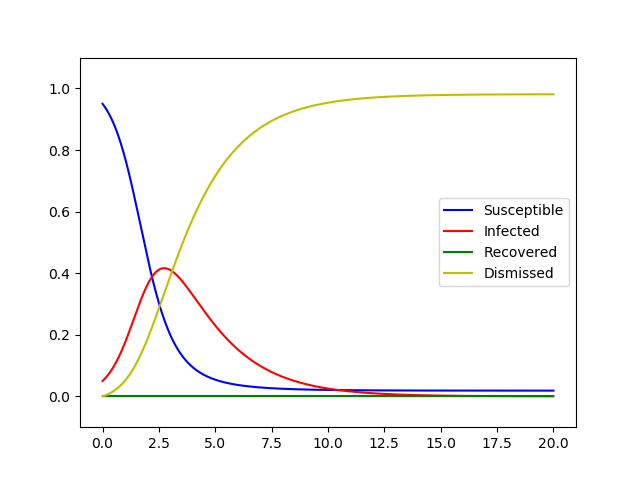

interactive(children=(FloatSlider(value=2.0, description='beta', layout=Layout(width='100%'), max=5.0, step=0.…

In [7]:
N = 1

I_start = 0.01
S_start = N - I_start
R_start = 0
D_start = 0

def df(SIRD, t, N, b, g, l, m, a):
    s, i, r, d = SIRD
    dSdt = l*s - m*s - b*s*i + r
    dIdt = b*s*i - g*a*i - g*(1-a)*i - m*i
    dRdt = g*a*i - m*r - r
    dDdt = g*(1-a)*i
    return dSdt, dIdt, dRdt, dDdt

t = np.linspace(0, 20, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-0.1, 1.1)
ls, = ax.plot(t, t, 'b', label='Susceptible')
li, = ax.plot(t, t, 'r', label='Infected')
lr, = ax.plot(t, t, 'g', label='Recovered')
ld, = ax.plot(t, t, 'y', label='Dismissed')
ax.legend()

@interact(beta =FloatSlider(2  , min=0, max=5, step=0.01, layout=Layout(width='100%')),
          gamma=FloatSlider(0.5, min=0, max=1, step=0.01, layout=Layout(width='100%')),
          lamda=FloatSlider(0  , min=0, max=5, step=0.01, layout=Layout(width='100%')),
          mu   =FloatSlider(0  , min=0, max=5, step=0.01, layout=Layout(width='100%')),
          alpha=FloatSlider(0  , min=0, max=1, step=0.01, layout=Layout(width='100%')))
def f(beta=2, gamma=0.5, lamda=1.85, mu=0.77, alpha=0):
    R0 = beta / gamma if lamda==mu==0 else (beta*lamda)/(mu*(mu+gamma))
    print(f'Basic reproduction number, R0: {R0:.2g}')
    print(f"There's {'an' if R0 > 1 else 'no'} epidemic outbreak.")
    sol = odeint(df, (S_start, I_start, R_start, D_start), t, args=(N, beta, gamma, lamda, mu, alpha))
    s, i, r, d = sol.T
    ls.set_ydata(s)
    li.set_ydata(i)
    lr.set_ydata(r)
    ld.set_ydata(d)